In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Not detected")


CUDA available: True
CUDA device count: 1
CUDA name: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [5]:
import gc
gc.collect()


0

In [1]:
import cv2

# Mở video-
cap = cv2.VideoCapture('VID_RGB_041.mp4')

# Lấy thông tin về video gốc
fps = cap.get(cv2.CAP_PROP_FPS)  # Tần suất khung hình (Frames per second)
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec cho video output
output_video = cv2.VideoWriter('output_video.mp4', fourcc, fps, (1080, 720))  # Video output với kích thước 1080x720

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Thay đổi kích thước video từ 1080x1920 về 1080x720
    resized_frame = cv2.resize(frame, (1080, 720))

    # Ghi khung hình đã thay đổi kích thước vào video output
    output_video.write(resized_frame)

# Giải phóng tài nguyên
cap.release()
output_video.release()
cv2.destroyAllWindows()


In [1]:
def reorder_vector_list(vector_list, new_order, exclude_ids=None):
    """
    Sắp xếp lại danh sách vector (dạng list) theo thứ tự chỉ mục và loại bỏ các chỉ mục không mong muốn.

    :param vector_list: Danh sách các vector (list of list)
    :param new_order: Danh sách index mong muốn sắp xếp lại
    :param exclude_ids: Danh sách index cần loại bỏ (mặc định: None)
    :return: Danh sách vector đã sắp xếp lại
    """
    if exclude_ids is None:
        exclude_ids = []

    return [vector_list[i] for i in new_order if i not in exclude_ids]


In [4]:
def reorder_vector_list(vector_list, new_order, exclude_ids=None):
    """
    Sắp xếp lại danh sách vector (dạng list) theo thứ tự chỉ mục và loại bỏ các chỉ mục không mong muốn.

    :param vector_list: Danh sách các vector (list of list)
    :param new_order: Danh sách index mong muốn sắp xếp lại
    :param exclude_ids: Danh sách index cần loại bỏ (mặc định: None)
    :return: Danh sách vector đã sắp xếp lại
    """
    if exclude_ids is None:
        exclude_ids = []
    vector_list = [[x, z, y] for x, y, z in vector_list]

    return [vector_list[i] for i in new_order if i not in exclude_ids]

# Dữ liệu của bạn
vectors = [
  [0.0, 0.0, 0.4046794772],
  [0.0991837382, 0.0631346852, 0.3850249350],
  [-0.0299695265, 0.5544579029, 0.3450466692],
  [-0.1951226145, 0.2837142050, 0.0],
  [-0.0952962115, -0.0472405218, 0.4259151518],
  [-0.1400584877, 0.4669830501, 0.3440456390],
  [-0.1155816987, 0.4523978531, 0.0216770098],
  [0.0415148698, 0.1371342540, 0.6115443110],
  [-0.0756646469, 0.3377822936, 0.8295413256],
  [-0.0981675982, 0.4263774455, 0.9049654007],
  [-0.1227598786, 0.3314690292, 1.0],
  [-0.1862954646, 0.1954971403, 0.8126580715],
  [-0.3924702704, 0.1348356456, 0.8144415617],
  [-0.3492114246, 0.3010489047, 0.9583231211],
  [0.0893942714, 0.3722827733, 0.7830520272],
  [0.3208796084, 0.5170154572, 0.7193812132],
  [0.5472443700, 0.6881015897, 0.6478358507]
]

vectors = np.array(vectors)
print(vectors.shape)

# Thứ tự mong muốn
new_order = [0, 7, 8, 9, 11, 12, 13, 14, 15, 16, 4, 5, 6, 1, 2, 3]
exclude = [10]

# Gọi hàm
reordered_vectors = reorder_vector_list(vectors, new_order, exclude)
print("Reordered vectors shape:", np.array(reordered_vectors).shape)

# In kết quả
# for v in reordered_vectors:
    # print(v)


(17, 3)
Reordered vectors shape: (16, 3)


In [16]:
def show3Dpose(vals, ax):
    ax.view_init(elev=15., azim=70)

    lcolor=(0,0,1)
    rcolor=(1,0,0)

    I = np.array([0, 0, 1, 4, 2, 5, 0, 7, 8, 8, 14, 15, 11, 12, 8, 9])
    J = np.array([1, 4, 2, 5, 3, 6, 7, 8, 14, 11, 15, 16, 12, 13, 9, 10])

    LR = np.array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=bool)

    # Plotting the connections between joints
    for i in np.arange(len(I)):
        x, y, z = [np.array([vals[I[i], j], vals[J[i], j]]) for j in range(3)]
        ax.plot(x, y, z, lw=2, color=lcolor if LR[i] else rcolor)

    RADIUS = 0.72
    RADIUS_Z = 0.7
    # 🟢 Draw a marker at each joint
    ax.scatter(vals[:, 0], vals[:, 1], vals[:, 2], c='k', s=25, marker='o')  # 'k' = black

    # Add the index labels on each point
    for idx, (x, y, z) in enumerate(vals):
        ax.text(x, y, z, str(idx), color='red', fontsize=10)  # Show the index in red color, you can customize it

    xroot, yroot, zroot = vals[0, 0], vals[0, 1], vals[0, 2]
    ax.set_xlim3d([-RADIUS + xroot, RADIUS + xroot])
    ax.set_ylim3d([-RADIUS + yroot, RADIUS + yroot])
    ax.set_zlim3d([-RADIUS_Z + zroot, RADIUS_Z + zroot])
    ax.set_aspect('auto')  # works fine in matplotlib==2.2.2

    # Customizing pane colors (transparent)
    white = (1.0, 1.0, 1.0, 0.0)
    ax.xaxis.set_pane_color(white)
    ax.yaxis.set_pane_color(white)
    ax.zaxis.set_pane_color(white)

    # Disable axis labels
    ax.tick_params('x', labelbottom=False)
    ax.tick_params('y', labelleft=False)
    ax.tick_params('z', labelleft=False)

    # Optional: Adding unit markers or gridlines
    ax.set_xlabel('X-axis (unit)')
    ax.set_ylabel('Y-axis (unit)')
    ax.set_zlabel('Z-axis (unit)')
    
    # Optionally add gridlines
    ax.grid(True)

    # Optional: Adding a line for the origin (for reference)
    ax.plot([xroot, 0], [yroot, 0], [zroot, 0], 'k--')  # dashed line to origin


Shape of post_out: (17, 3)
[[ 0.          0.          0.40467948]
 [ 0.09918374  0.06313469  0.38502494]
 [-0.02996953  0.5544579   0.34504667]
 [-0.19512261  0.2837142   0.        ]
 [-0.09529621 -0.04724052  0.42591515]
 [-0.14005849  0.46698305  0.34404564]
 [-0.1155817   0.45239785  0.02167701]
 [ 0.04151487  0.13713425  0.61154431]
 [-0.07566465  0.33778229  0.82954133]
 [-0.0981676   0.42637745  0.9049654 ]
 [-0.12275988  0.33146903  1.        ]
 [-0.18629546  0.19549714  0.81265807]
 [-0.39247027  0.13483565  0.81444156]
 [-0.34921142  0.3010489   0.95832312]
 [ 0.08939427  0.37228277  0.78305203]
 [ 0.32087961  0.51701546  0.71938121]
 [ 0.54724437  0.68810159  0.64783585]]


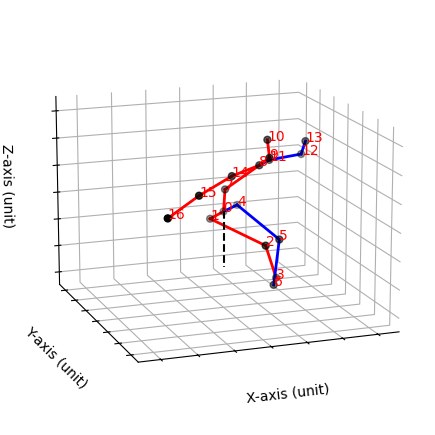

In [17]:
# post_out = np.array([[ 0.          , 0.          , 0.5476771 ],
#                      [ 0.0167164   , 0.09418187 , 0.5490093 ],
#                      [-0.06033849 , 0.24823268 , 0.29791805],
#                      [ 0.17562278 , 0.1701734  , 0.04656263],
#                      [-0.02116718 , -0.08970176, 0.5468632 ],
#                      [-0.26510894 , -0.11095609, 0.3084845 ],
#                      [-0.2996802  , 0.11161903 , 0.        ],
#                      [-0.05454319 , 0.05767656 , 0.71957964],
#                      [-0.22261144 , 0.15629125 , 0.8713493 ],
#                      [-0.28067803 , 0.20590681 , 0.92674994],
#                      [-0.27616167 , 0.18180399 , 1.        ],
#                      [-0.21066494 , 0.00345052 , 0.8696245 ],
#                      [-0.22734042 , -0.19802934, 0.7451177 ],
#                      [-0.3792025  , -0.18990567, 0.6404989 ],
#                      [-0.17738932 , 0.26128817 , 0.8432141 ],
#                      [-0.25439307 , 0.49695414 , 0.83289486],
#                      [-0.38871703 , 0.6463937  , 0.8044516 ]])
post_out = np.array([
  [0.0, 0.0, 0.4046794772],
  [0.0991837382, 0.0631346852, 0.3850249350],
  [-0.0299695265, 0.5544579029, 0.3450466692],
  [-0.1951226145, 0.2837142050, 0.0],
  [-0.0952962115, -0.0472405218, 0.4259151518],
  [-0.1400584877, 0.4669830501, 0.3440456390],
  [-0.1155816987, 0.4523978531, 0.0216770098],
  [0.0415148698, 0.1371342540, 0.6115443110],
  [-0.0756646469, 0.3377822936, 0.8295413256],
  [-0.0981675982, 0.4263774455, 0.9049654007],
  [-0.1227598786, 0.3314690292, 1.0],
  [-0.1862954646, 0.1954971403, 0.8126580715],
  [-0.3924702704, 0.1348356456, 0.8144415617],
  [-0.3492114246, 0.3010489047, 0.9583231211],
  [0.0893942714, 0.3722827733, 0.7830520272],
  [0.3208796084, 0.5170154572, 0.7193812132],
  [0.5472443700, 0.6881015897, 0.6478358507]
])
fig = plt.figure(figsize=(9.6, 5.4))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05) 
ax = plt.subplot(gs[0], projection='3d')
print(f"Shape of post_out: {post_out.shape}")
print(post_out)
show3Dpose(post_out, ax)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dummy data for the 16 joints (x, y, z for each) — replace with actual data if available
# Format: [x0, y0, z0, x1, y1, z1, ..., x15, y15, z15]
joints = np.array([
    0, 0, 0,      # root
    0, 1, 0,      # spine
    0, 2, 0,      # neck
    0, 3, 0,      # head
    -1, 2, 0,     # left shoulder
    -1.5, 1.5, 0, # left elbow
    -2, 1, 0,     # left hand
    1, 2, 0,      # right shoulder
    1.5, 1.5, 0,  # right elbow
    2, 1, 0,      # right hand
    -0.5, -1, 0,  # left hip
    -0.5, -2, 0,  # left knee
    -0.5, -3, 0,  # left foot
    0.5, -1, 0,   # right hip
    0.5, -2, 0,   # right knee
    0.5, -3, 0    # right foot
]).reshape(-1, 3)

# Define joint connections (pairs of indices)
connections = [
    (0, 1), (1, 2), (2, 3),             # spine to head
    (2, 4), (4, 5), (5, 6),             # left arm
    (2, 7), (7, 8), (8, 9),             # right arm
    (0, 10), (10, 11), (11, 12),        # left leg
    (0, 13), (13, 14), (14, 15)         # right leg
]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Human Skeleton")

# Plot joints
ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], c='red', s=50)

# Plot connections
for (i, j) in connections:
    ax.plot([joints[i, 0], joints[j, 0]],
            [joints[i, 1], joints[j, 1]],
            [joints[i, 2], joints[j, 2]], c='blue')

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()
